### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

# 1. Classificando dados

In [31]:
import pandas as pd

In [32]:
data = pd.read_csv("data/emp_automovel.csv")
data

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [33]:
data['inadimplente'].value_counts()

inadimplente
0    49309
1     4716
Name: count, dtype: int64

In [34]:
data.describe()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
count,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000,54025.000000
mean,17410.722321,2779.063672,12.147035,0.278075,2.022922,0.490915,0.522771,0.512252,0.117734,975.491009,0.087293
std,9658.762569,1305.364734,7.452120,0.448055,0.498807,0.142389,0.875945,0.062725,0.076180,818.141709,0.282266
min,2700.000000,218.700000,0.000000,0.000000,1.000000,0.014568,0.000005,0.000527,0.000000,0.000000,0.000000
25%,11700.000000,2002.500000,12.157324,0.000000,2.000000,0.492810,0.407054,0.513171,0.091800,302.000000,0.000000
50%,16855.246324,2722.188351,12.157324,0.000000,2.000000,0.501213,0.554789,0.513171,0.117428,810.000000,0.000000
75%,20250.000000,3199.500000,12.157324,1.000000,2.000000,0.501213,0.659141,0.513171,0.117428,1563.000000,0.000000
max,450000.000000,22500.000000,69.000000,1.000000,3.000000,0.942680,100.000000,0.869211,1.000000,4185.000000,1.000000


## Decision Tree Classifier

In [35]:
x = data.drop(columns= 'inadimplente') # variáveis explicativas
y = data['inadimplente'] # variável alvo

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc = DecisionTreeClassifier()
dtc.fit(x, y)

print(f"DTC score: {dtc.score(x, y)}")

DTC score: 1.0


### **OPEN - Dividing data into 3: train, validation and test**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_split, x_test, y_split, y_test = train_test_split(x, y, test_size= .125, stratify= y, random_state= 42)

In [40]:
x_train, x_valid, y_train, y_valid = train_test_split(x_split, y_split, test_size= .125, stratify= y_split, random_state= 42)

In [41]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(x_train, y_train)

print(f"DTC Train score: {dtc.score(x_valid, y_valid)} x {dtc.score(x_train, y_train)}")

DTC Train score: 0.9075985784396683 x 0.9200473864900149


### Avaliar o modelo

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
y_predicted_dtc = dtc.predict(x_valid)
con_matrix = confusion_matrix(y_valid, y_predicted_dtc)
print(con_matrix)

[[5350   43]
 [ 503   13]]


In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

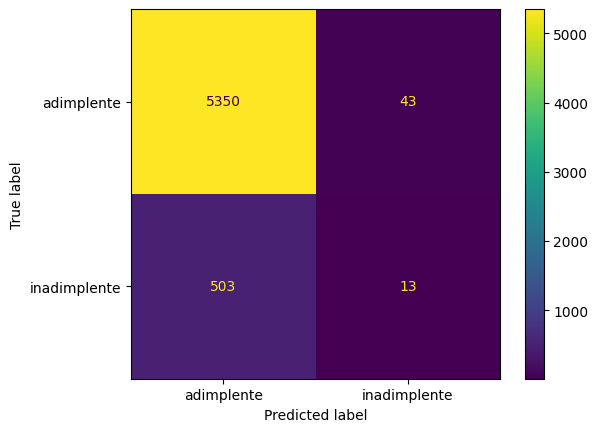

In [45]:
graph = ConfusionMatrixDisplay(con_matrix, display_labels=['adimplente', 'inadimplente'])
graph.plot();

In [46]:
# from sklearn.ensemble import RandomForestClassifier

In [47]:
# rfc = RandomForestClassifier(max_depth=5)
# rfc.fit(x_train, y_train)
# rfc.score(x_valid, y_valid)

In [48]:
# from sklearn.metrics import confusion_matrix

In [49]:
# y_predicted_rfc = rfc.predict(x_valid)
# rfc_conf_mat = confusion_matrix(y_valid, y_predicted_rfc)

In [50]:
# from sklearn.metrics import ConfusionMatrixDisplay

In [51]:
# graph_rfc = ConfusionMatrixDisplay(rfc_conf_mat)
# graph_rfc.plot();

### **Acurácia, precisão, recall e f1-score**

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_predicted_dtc) * 100

90.75985784396683

In [53]:
from sklearn.metrics import precision_score
precision_score(y_valid, y_predicted_dtc) * 100

np.float64(23.214285714285715)

In [54]:
from sklearn.metrics import recall_score
recall_score(y_valid, y_predicted_dtc) * 100

np.float64(2.5193798449612403)

In [55]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_predicted_dtc) * 100

np.float64(4.545454545454546)

### **ROC**

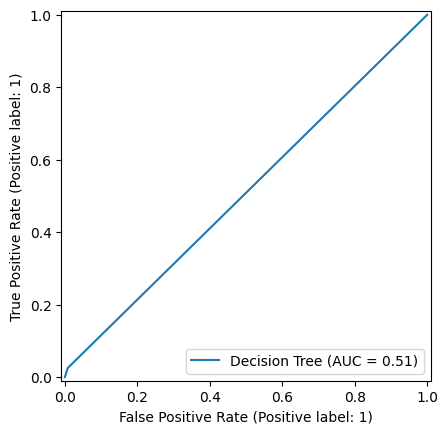

In [56]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_valid, y_predicted_dtc, name='Decision Tree');

**Modelo ruim, pois está na curva**

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, y_predicted_dtc)

np.float64(0.5086102498645243)

### **Curva precisão x recall**

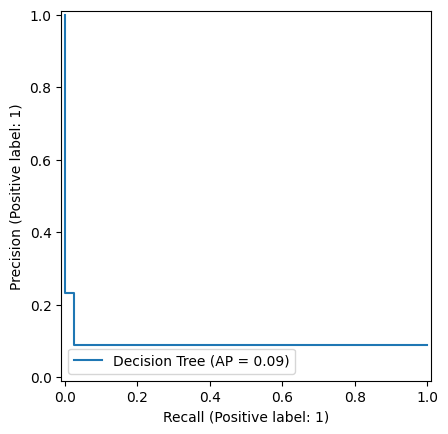

In [58]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_predictions(y_valid, y_predicted_dtc, name='Decision Tree');

**Modelo ruim, pois está próximo de (0,0)**

In [59]:
from sklearn.metrics import average_precision_score
average_precision_score(y_valid, y_predicted_dtc)

np.float64(0.09097294688339783)

### **Relatório das métricas de uma vez**

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, y_predicted_dtc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5393
           1       0.23      0.03      0.05       516

    accuracy                           0.91      5909
   macro avg       0.57      0.51      0.50      5909
weighted avg       0.85      0.91      0.87      5909



## Validação cruzada

### **Para a Acurácia**

In [70]:
from sklearn.model_selection import cross_validate, KFold

In [71]:
dtc_model = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(dtc_model, x_split, y_split, cv=kf)
cv_resultados

{'fit_time': array([0.53656626, 0.40635133, 0.49918056, 0.30917335, 0.27626014]),
 'score_time': array([0.02194118, 0.01097155, 0.00498652, 0.00797868, 0.00797772]),
 'test_score': array([0.90851401, 0.91347578, 0.91061984, 0.90427332, 0.90321557])}

In [79]:
cv_resultados['test_score']

array([0.90851401, 0.91347578, 0.91061984, 0.90427332, 0.90321557])

In [84]:
media = cv_resultados['test_score'].mean()
dp = cv_resultados['test_score'].std()
print(f"Invervalo confiança: ({media - 2*dp}, {min(media + 2*dp, 1)})")

Invervalo confiança: (0.9003313313506867, 0.9157080799455375)


### **Para o Recall**

In [96]:
dtc_model = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(dtc_model, x_split, y_split, cv=kf, scoring='recall')
print(f"Média de {cv_resultados['test_score'].mean()} com variância de {cv_resultados['test_score'].var()}")

Média de 0.028704466951693274 com variância de 6.967120816688674e-05


In [97]:
cv_resultados['test_score'].mean()

np.float64(0.028704466951693274)

### **Estratificando os dados**

In [98]:
from sklearn.model_selection import StratifiedKFold

In [99]:
dtc_model = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_resultados = cross_validate(dtc_model, x_split, y_split, cv=skf, scoring='recall')
print(f"Média de {cv_resultados['test_score'].mean()} com variância de {cv_resultados['test_score'].var()}")

Média de 0.028357766527258056 com variância de 4.859213749974355e-05
